# Manejo de K-means con truco del núcleo

## Enunciado:

- Adjunto tenéis unos datos en dos dimensiones.
- Pero aplicar K-means "a secas", no lo hará, compruébalo. 
- Después aplica el truco del núcleo a ver qué pasa.
- Y después usa DBSCAN y DBPC a ver qué pasa...

Visualización de los datos del csv.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('csv/synthetic_data4.csv')
df.head()

,X1,X2,Cluster
0,0.682988,-0.345203,1
1,2.040990,-0.131615,1
2,-0.139752,0.454391,1
3,0.885748,0.286342,0
4,1.182459,-0.497711,1


Visualización de los datos para ver su distribución.

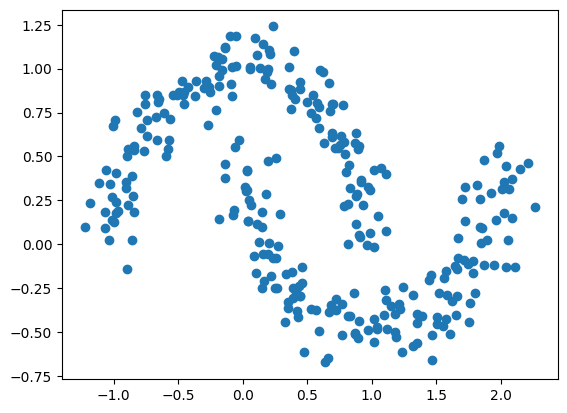

In [15]:
plt.scatter(df['X1'], df['X2'])
plt.show()

Realizamos un análisis cluster para ver si se pueden separar los datos en dos grupos.

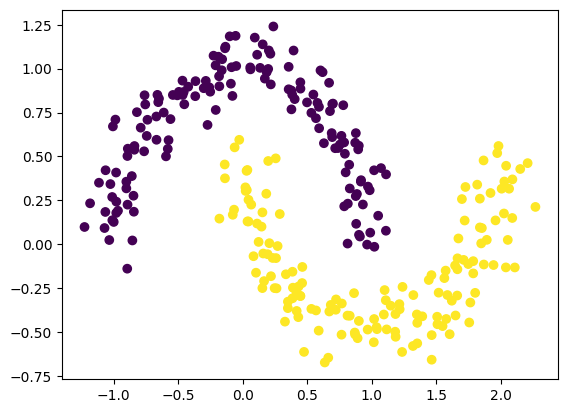

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Aplicamos K-means con 2 clusters
kmeans = KMeans(n_clusters=2)
df['cluster'] = kmeans.fit_predict(X)

# Visualizamos los clusters
plt.scatter(df['X1'], df['X2'], c=df['cluster'])
plt.show()

### 1. Aplicación del método K-means sin el truco del núcleo

Lo primero que haremos será ver el valor de clusters óptimo utilizando ElBow y BIC 

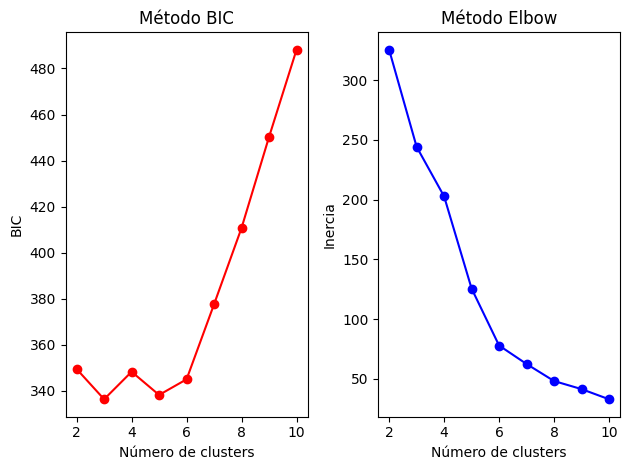

In [59]:
import numpy as np

# Función para calcular el índice BIC
def BIC(K, grupos, X):
    N = X.shape[0]  # Número de datos
    P = X.shape[1]  # Número de variables
    xi = np.zeros((1, K))  # Vector xi

    # Calcula el sumatorio de xi en la fórmula
    for k in range(0, K):
        suma = 0
        for j in range(0, P):
            sigma = np.square(np.std(X[:, j]))
            sigma_j = np.square(np.std(X[grupos == k, j]))
            suma += 0.5 * np.log(sigma + sigma_j)

        n_k = sum(grupos == k)  # Número de elementos en el grupo k
        xi[0, k] = -n_k * suma

    bic = -2 * np.sum(xi) + 2 * K * P * np.log(N)
    return bic

# Encuentra el número óptimo de clusters utilizando Elbow y BIC
Kmax = 10
inercias = []
bics = []

for k in range(2, Kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    grupos = kmeans.predict(X)
    inercias.append(kmeans.inertia_)
    bics.append(BIC(k, grupos, X))
    
# Muestra los resultados
# Crear el subplot
fig, axs = plt.subplots(1, 2)

# Graficar BIC
axs[0].plot(range(2, Kmax + 1), bics, color='red', marker='o')
axs[0].set_xlabel('Número de clusters')
axs[0].set_ylabel('BIC')
axs[0].set_title('Método BIC')

# Graficar Elbow
axs[1].plot(range(2, Kmax + 1), inercias, color='blue', marker='o')
axs[1].set_xlabel('Número de clusters')
axs[1].set_ylabel('Inercia')
axs[1].set_title('Método Elbow')

# Ajustar el espaciado para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [64]:
# Encontrar el número óptimo de clusters según BIC
numero_optimo_clusters_bic = np.argmin(bics) + 2
print("Número óptimo de clusters según BIC:", numero_optimo_clusters_bic)

Número óptimo de clusters según BIC: 3


Como se puede observar en la gráfica de Elbow y BIC, el número óptimo de clusters es 3. Pero visualmente se puede ver que los datos se pueden separar en 2 clusters.

### 2. Aplicamos el truco del núcleo